***Modeling finger pose based on time-series sensor measurements by using SVM and neural network models for the 5-dimensional regression problem***

*Garold Murdachaew*

*2 April 2021*

**Introduction**

The surface electromyography (sEMG)-based gesture recognition with a deep learning approach and real-time recognition can become important in practical, advanced human-computer interaction. The sEMG signal is obtained by an armband with non-invasive skin-contact sEMG electrodes. The electrical activity recorded allows development of a human-computer interface system which can be emplyed in a number of areas: Assistive or Rehabilitative technology (e.g., myoelectric controlled prosthesis or assistive robots or even sEMG-driven exoskeletons); Serious games and advanced, intuitive and more natural input and simulation control; and Silent speech recognition. For additional information and background, see, e.g.:

0. Wikipedia, Human–computer interaction.
https://en.wikipedia.org/wiki/Human%E2%80%93computer_interaction

1. Reaz MB, Hussain M, Mohd-Yasin F. Techniques of EMG signal analysis: detection, processing, classification and applications. Biological Procedures Online. 2006;8(1):11–35.
https://link.springer.com/article/10.1251/bpo124

2. Hakonen M, Piitulainen H, Visala A. Current state of digital signal processing in myoelectric interfaces and related applications. Biomed Signal Process Control. 2015;18:334–359.
https://www.sciencedirect.com/science/article/pii/S174680941500021X

3. Hu Y, Wong Y, Wei W, Du Y, Kankanhalli M, Geng W. A novel attention-based hybrid CNN-RNN architecture for sEMG-based gesture recognition. PLOS ONE 2018;13:e0206049.
https://doi.org/10.1371/journal.pone.0206049

**Data overview**

The data consists of synchronised sensor readings and labels from multiple sequences of different gestures and hand movements collected for one hand collected at approx. 50Hz. The sensor data/features consists of 30-dimensional vectors (the number of channels in our current wristband) and 5-dimensional groundtruth/labels vectors (the number of fingers in a hand). Thus, each sequence is composed of a feature vector X (t x 30) and a label vector Y (t x 5). The sensors readings are collected at 10-bit resolution, [0, 1024].

**Goal of this project**

Predict the pose of the hand (angles of the fingers) based on armband electrical sensor data using a machine-learning method such as SVR or a neural network approach.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/My Drive/challenge')

Mounted at /content/drive


In [2]:
import joblib as joblib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

features, labels = joblib.load('/content/drive/My Drive/challenge/data.dat')

print(len(features))
print(len(labels))

51
51


In [3]:
print(features)

[array([[341., 347., 341., ..., 289., 319., 253.],
       [341., 347., 341., ..., 289., 319., 253.],
       [341., 348., 341., ..., 289., 320., 253.],
       ...,
       [352., 364., 351., ..., 297., 327., 253.],
       [352., 364., 351., ..., 297., 328., 253.],
       [353., 366., 352., ..., 297., 329., 253.]]), array([[339., 345., 338., ..., 287., 321., 251.],
       [340., 345., 338., ..., 287., 321., 251.],
       [340., 345., 338., ..., 287., 321., 251.],
       ...,
       [349., 356., 344., ..., 284., 320., 250.],
       [349., 356., 344., ..., 284., 319., 250.],
       [349., 356., 344., ..., 284., 319., 250.]]), array([[344., 352., 342., ..., 288., 323., 250.],
       [345., 352., 342., ..., 288., 324., 250.],
       [345., 352., 342., ..., 288., 324., 250.],
       ...,
       [347., 355., 341., ..., 286., 321., 251.],
       [348., 355., 341., ..., 284., 320., 251.],
       [348., 354., 341., ..., 284., 320., 251.]]), array([[349., 358., 347., ..., 289., 327., 252.],
       

In [4]:
X = np.array(features)
print(X.shape)
X = np.vstack(X)
print(X.shape)
print(254649.0/51.0)

(51,)
(254649, 30)
4993.117647058823


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [5]:
print(labels)

[array([[ 0.22357153,  0.99496208,  0.9940664 ,  0.99074757,  0.91400573],
       [ 0.41729854,  0.966014  ,  0.9855725 ,  0.98592047,  0.95746513],
       [ 0.48011878,  0.96245373,  0.97715618,  0.98331914,  0.96457863],
       ...,
       [ 0.63009817,  0.13606796,  0.98412117,  0.99235427,  0.97295161],
       [ 0.64609004,  0.07412773,  0.98218364,  0.99228163,  0.9731793 ],
       [ 0.66263708, -0.01864924,  0.97818341,  0.99152175,  0.97322957]]), array([[0.59707617, 0.97743352, 0.99334639, 0.97818781, 0.92460271],
       [0.59707617, 0.97743352, 0.99334639, 0.97818781, 0.92460271],
       [0.52644804, 0.93138986, 0.94155202, 0.94964942, 0.94444561],
       ...,
       [0.47024847, 0.97686443, 0.98020032, 0.98291061, 0.98350375],
       [0.52310958, 0.98441192, 0.98495422, 0.98592252, 0.98623745],
       [0.56086595, 0.98873544, 0.98878535, 0.98820385, 0.9827189 ]]), array([[0.61388726, 0.99018379, 0.99391123, 0.97975816, 0.94352495],
       [0.61388726, 0.99018379, 0.99391123, 

In [6]:
y = np.array(labels)
print(y.shape)
y = np.vstack(y)
print(y.shape)
print(254649.0/51.0)

(51,)
(254649, 5)
4993.117647058823


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [7]:
print(X.shape)
print(y.shape)

(254649, 30)
(254649, 5)


In [8]:
np.min(X), np.max(X), np.mean(X), np.std(X)

(85.0, 428.0, 285.5111863781126, 56.50653978475112)

In [9]:
# Normalize data to have feature values between 0 and 1:
# divide by max possible feature value (1024 = 10-bit resolution)
# Can also save memory by reducing resolution to 4 bytes
X = X.astype('float32') / 1024.0 # below will also use StandardScaler, will train on train set, better for NN applications
np.min(X), np.max(X), np.mean(X), np.std(X)

(0.08300781, 0.41796875, 0.2788194, 0.05518215)

In [10]:
np.min(y), np.max(y), np.mean(y), np.std(y)

(-0.8530592602330528,
 0.9999998970859174,
 0.47607780591018983,
 0.610256904199233)

In [11]:
# Can also safely reduce resolution of the labels to 4 bytes
y = y.astype('float32')
np.min(y), np.max(y), np.mean(y), np.std(y)

(-0.85305923, 0.9999999, 0.47607765, 0.61025685)

In [12]:
# Examine each of the features
print("Feature  min     max      mean     std")
for j in range(X.shape[1]):
    print("%4d %8.2f %8.2f %8.2f %8.2f" % (j, np.min(X[:, j]), np.max(X[:, j]), np.mean(X[:, j]), np.std(X[:, j])))

Feature  min     max      mean     std
   0     0.31     0.37     0.34     0.01
   1     0.27     0.41     0.34     0.02
   2     0.23     0.41     0.33     0.03
   3     0.13     0.34     0.24     0.04
   4     0.19     0.36     0.27     0.03
   5     0.12     0.30     0.20     0.03
   6     0.21     0.38     0.30     0.03
   7     0.21     0.41     0.32     0.03
   8     0.19     0.41     0.33     0.03
   9     0.22     0.39     0.31     0.03
  10     0.29     0.37     0.32     0.01
  11     0.19     0.40     0.30     0.04
  12     0.14     0.39     0.26     0.04
  13     0.13     0.34     0.21     0.04
  14     0.15     0.36     0.25     0.03
  15     0.21     0.39     0.28     0.03
  16     0.11     0.40     0.27     0.04
  17     0.14     0.40     0.25     0.05
  18     0.15     0.42     0.28     0.04
  19     0.12     0.29     0.22     0.02
  20     0.34     0.41     0.37     0.01
  21     0.27     0.42     0.35     0.02
  22     0.20     0.40     0.28     0.03
  23     0.19     

In [13]:
# Examine each of the labels
print("Label  min     max      mean     std")
for j in range(y.shape[1]):
    print("%4d %8.2f %8.2f %8.2f %8.2f" % (j, np.min(y[:, j]), np.max(y[:, j]), np.mean(y[:, j]), np.std(y[:, j])))

Label  min     max      mean     std
   0    -0.72     0.93     0.27     0.39
   1    -0.85     1.00     0.50     0.65
   2    -0.84     1.00     0.50     0.69
   3    -0.77     1.00     0.50     0.67
   4    -0.66     1.00     0.61     0.55


In [14]:
import pandas as pd
from pandas.plotting import scatter_matrix

features_df = pd.DataFrame(X)
# Based on labels data, the order of columns seems to be:
# T = Thumb, I1-4 = Index, Middle, Ring, Pinkie finger
labels_df = pd.DataFrame(y, columns = ['Thumb','Index','Middle','Ring','Pinkie'])

In [15]:
labels_df

,Thumb,Index,Middle,Ring,Pinkie
0,0.223572,0.994962,0.994066,0.990748,0.914006
1,0.417299,0.966014,0.985573,0.985920,0.957465
2,0.480119,0.962454,0.977156,0.983319,0.964579
3,0.540952,0.969815,0.980815,0.984181,0.960435
4,0.549546,0.974830,0.980701,0.979593,0.947888
...,...,...,...,...,...
254644,0.854129,-0.537512,-0.581381,-0.546307,-0.378879
254645,0.854129,-0.537512,-0.581381,-0.546307,-0.378879
254646,0.853723,-0.538156,-0.582608,-0.548442,-0.382085
254647,0.852888,-0.537678,-0.582471,-0.549101,-0.383878


In [16]:
df = pd.concat([features_df, labels_df], axis=1)

In [17]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,Thumb,Index,Middle,Ring,Pinkie
0,0.333008,0.338867,0.333008,0.248047,0.286133,0.223633,0.318359,0.335938,0.339844,0.312500,0.323242,0.282227,0.253906,0.214844,0.256836,0.296875,0.286133,0.264648,0.283203,0.216797,0.364258,0.34375,0.272461,0.258789,0.203125,0.265625,0.249023,0.282227,0.311523,0.24707,0.223572,0.994962,0.994066,0.990748,0.914006
1,0.333008,0.338867,0.333008,0.248047,0.286133,0.223633,0.318359,0.335938,0.339844,0.312500,0.323242,0.282227,0.253906,0.214844,0.256836,0.296875,0.286133,0.264648,0.283203,0.216797,0.364258,0.34375,0.272461,0.258789,0.203125,0.265625,0.249023,0.282227,0.311523,0.24707,0.417299,0.966014,0.985573,0.985920,0.957465
2,0.333008,0.339844,0.333008,0.248047,0.287109,0.223633,0.318359,0.335938,0.339844,0.313477,0.323242,0.282227,0.253906,0.214844,0.257812,0.296875,0.286133,0.264648,0.283203,0.216797,0.364258,0.34375,0.272461,0.258789,0.203125,0.266602,0.249023,0.282227,0.312500,0.24707,0.480119,0.962454,0.977156,0.983319,0.964579
3,0.333008,0.339844,0.333008,0.248047,0.286133,0.223633,0.318359,0.335938,0.339844,0.312500,0.323242,0.283203,0.253906,0.215820,0.256836,0.296875,0.286133,0.264648,0.283203,0.217773,0.364258,0.34375,0.272461,0.258789,0.203125,0.265625,0.249023,0.282227,0.312500,0.24707,0.540952,0.969815,0.980815,0.984181,0.960435
4,0.333008,0.339844,0.333008,0.248047,0.286133,0.223633,0.318359,0.335938,0.339844,0.313477,0.323242,0.283203,0.253906,0.215820,0.256836,0.296875,0.286133,0.264648,0.283203,0.217773,0.363281,0.34375,0.272461,0.258789,0.203125,0.265625,0.249023,0.282227,0.312500,0.24707,0.549546,0.974830,0.980701,0.979593,0.947888


In [18]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,Thumb,Index,Middle,Ring,Pinkie
254644,0.332031,0.333984,0.317383,0.220703,0.245117,0.168945,0.278320,0.302734,0.308594,0.291992,0.316406,0.299805,0.273438,0.202148,0.227539,0.262695,0.259766,0.240234,0.255859,0.208008,0.370117,0.362305,0.321289,0.273438,0.212891,0.245117,0.225586,0.259766,0.28418,0.233398,0.854129,-0.537512,-0.581381,-0.546307,-0.378879
254645,0.332031,0.333984,0.318359,0.220703,0.245117,0.168945,0.278320,0.301758,0.308594,0.291992,0.316406,0.299805,0.273438,0.201172,0.227539,0.262695,0.259766,0.240234,0.255859,0.207031,0.370117,0.362305,0.321289,0.273438,0.212891,0.245117,0.224609,0.259766,0.28418,0.233398,0.854129,-0.537512,-0.581381,-0.546307,-0.378879
254646,0.332031,0.333984,0.318359,0.220703,0.245117,0.167969,0.278320,0.301758,0.308594,0.291992,0.316406,0.299805,0.273438,0.201172,0.227539,0.262695,0.258789,0.240234,0.255859,0.207031,0.370117,0.362305,0.322266,0.273438,0.212891,0.245117,0.224609,0.259766,0.28418,0.233398,0.853723,-0.538156,-0.582608,-0.548442,-0.382085
254647,0.332031,0.333984,0.318359,0.220703,0.245117,0.167969,0.277344,0.301758,0.308594,0.291992,0.316406,0.299805,0.273438,0.202148,0.227539,0.262695,0.258789,0.240234,0.255859,0.207031,0.371094,0.362305,0.322266,0.273438,0.211914,0.245117,0.224609,0.258789,0.28418,0.233398,0.852888,-0.537678,-0.582471,-0.549101,-0.383878
254648,0.332031,0.333984,0.318359,0.220703,0.244141,0.167969,0.277344,0.301758,0.307617,0.291992,0.316406,0.298828,0.273438,0.202148,0.226562,0.261719,0.258789,0.240234,0.255859,0.207031,0.371094,0.362305,0.322266,0.273438,0.211914,0.245117,0.224609,0.258789,0.28418,0.233398,0.852161,-0.538479,-0.583151,-0.550135,-0.385267


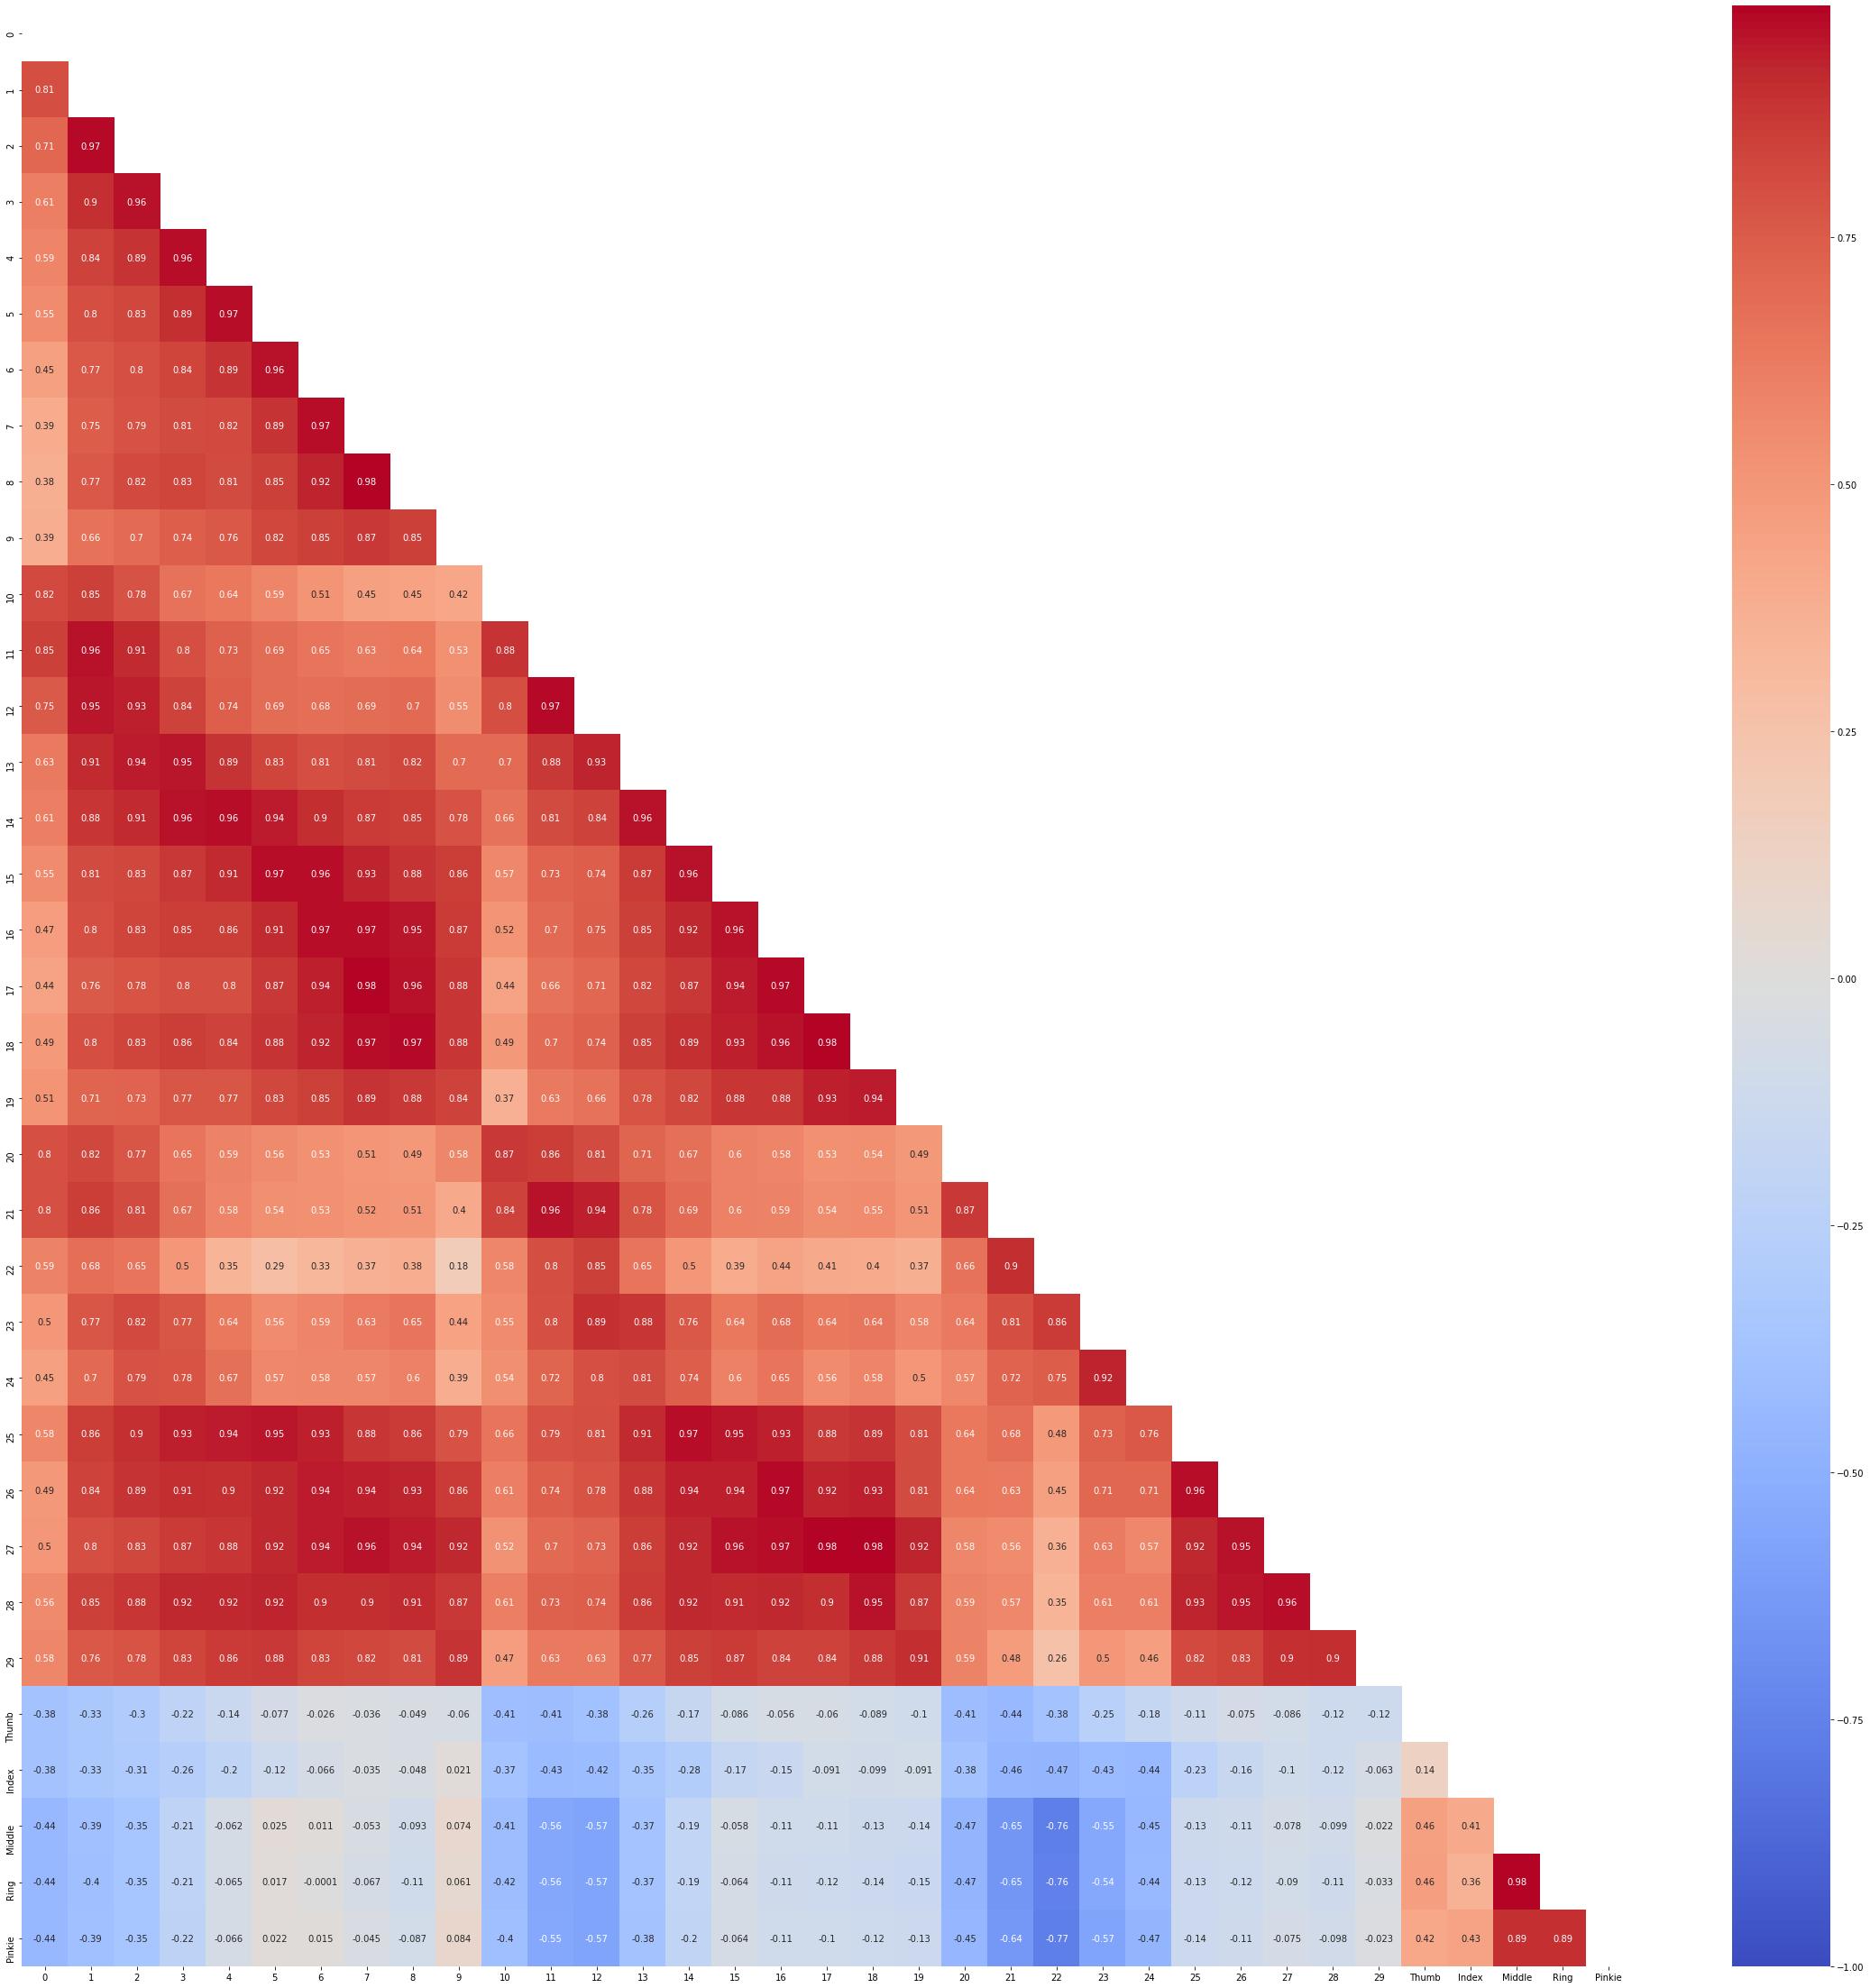

In [19]:
import seaborn as sns

corr_mat = df.corr()
mask = np.zeros_like(corr_mat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(40,40))
sns.heatmap(corr_mat, vmin=-1, cmap='coolwarm', annot=True, fmt='.2g', mask = mask)

There is no extremely strong obvious correlation between any two features nor bettween a feature and a label. Thus we should retain all features. (A PCA analysis could also be useful in determining if any linear combination of features is important or can be dropped. However, this sort of feature engineering was not tried here.)

What is obvious and interesting is that some labels are strongly correlated. This probably reflects the fact that most people cannot easily move the Middle, Ring, and Pinkie fingers completely independently.

In [20]:
def check_X_time_series(the_array):
    print()
    print('Check the X time series')
    #print(the_array.shape[1])
    j_max = 5
    i_max = the_array.shape[1] // j_max
    #print("i_max, j_max: ", i_max, j_max)
    fig, axs = plt.subplots(i_max, j_max, figsize=(50, 120))
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    x_axis = np.arange(the_array.shape[0])
    for column in range(the_array.shape[1]):
        i = column // j_max
        j = column % j_max
        axs[i, j].plot(x_axis, the_array[:,j], label = column)
        axs[i, j].set_title(column)
        axs[i, j].legend()
        axs[i, j].set_xlabel('time')
        axs[i, j].set_ylabel('data')

    plt.show()

**Examining the time series data (features and labels), choice of the StandardScaler (MinMaxScaler leads to problems in the NN fits), and data splitting**


Check the X time series


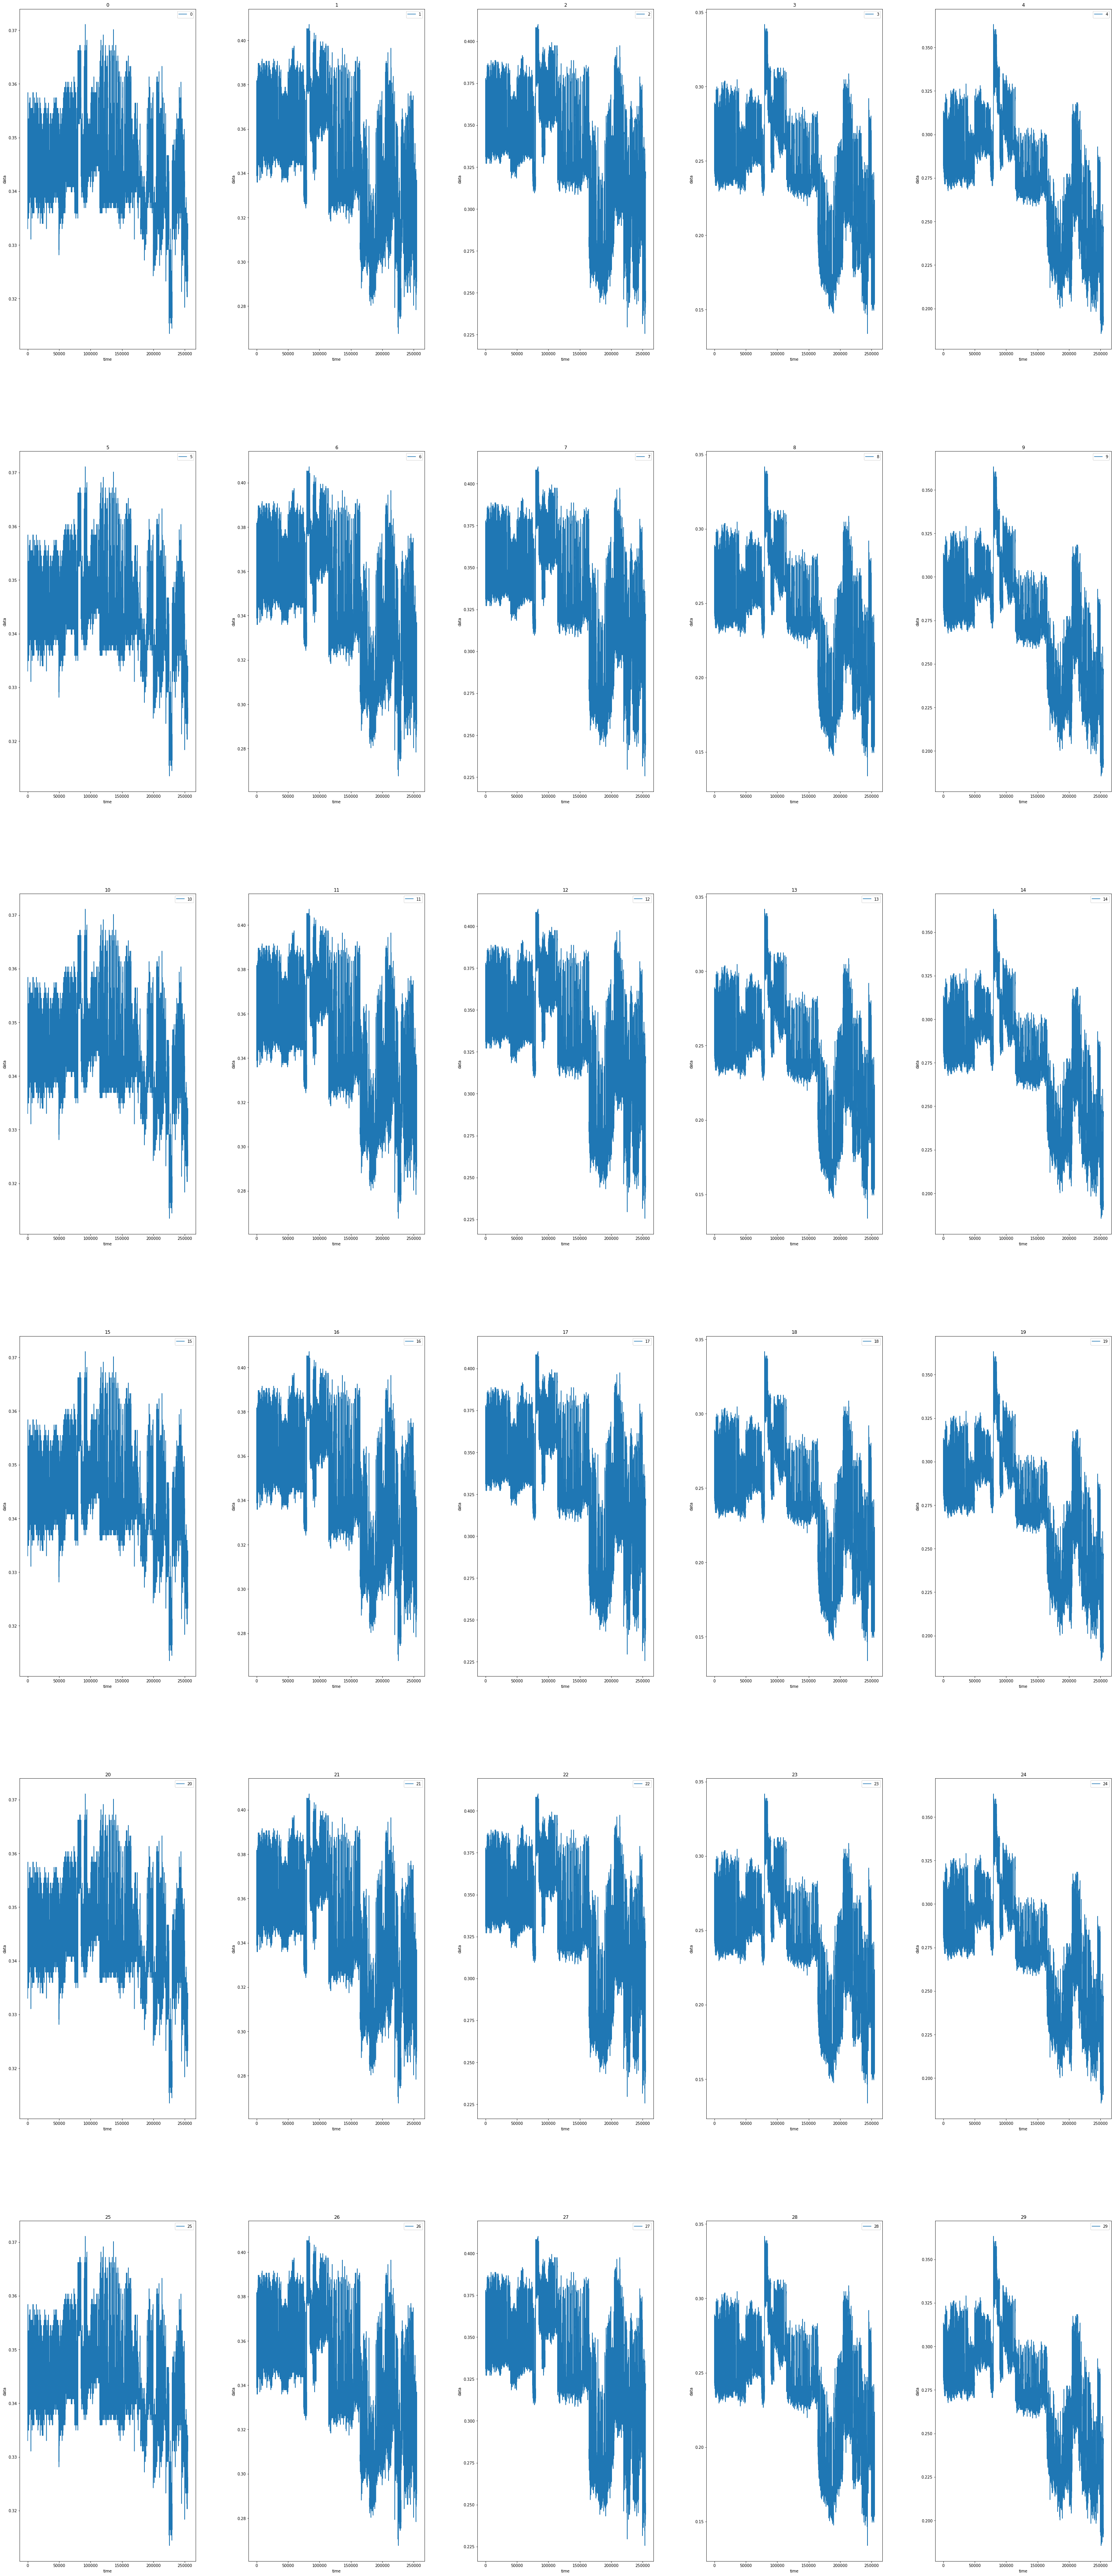

In [21]:
check_X_time_series(X)

In [22]:
def check_y_time_series(the_array):
    print()
    print('Check the y time series')
    #print(the_array.shape[1])
    j_max = 5
    i_max = the_array.shape[1] // j_max
    #print("i_max, j_max: ", i_max, j_max)
    fig, axs = plt.subplots(i_max, j_max, figsize=(50, 10))
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    titles = ['Label: 0 (Thumb)', 'Label: 1 (Index finger)', 'Label: 2 (Middle finger)', 'Label: 3 (Ring finger)', 'Label: 4 (Pinkie)']
    x_axis = np.arange(the_array.shape[0])
    for column in range(the_array.shape[1]):
        j = column % j_max
        axs[j].plot(x_axis, the_array[:,j], label = column)
        axs[j].set_title(titles[j])
        axs[j].legend()
        axs[j].set_xlabel('time')
        axs[j].set_ylabel('data')

    plt.show()


Check the y time series


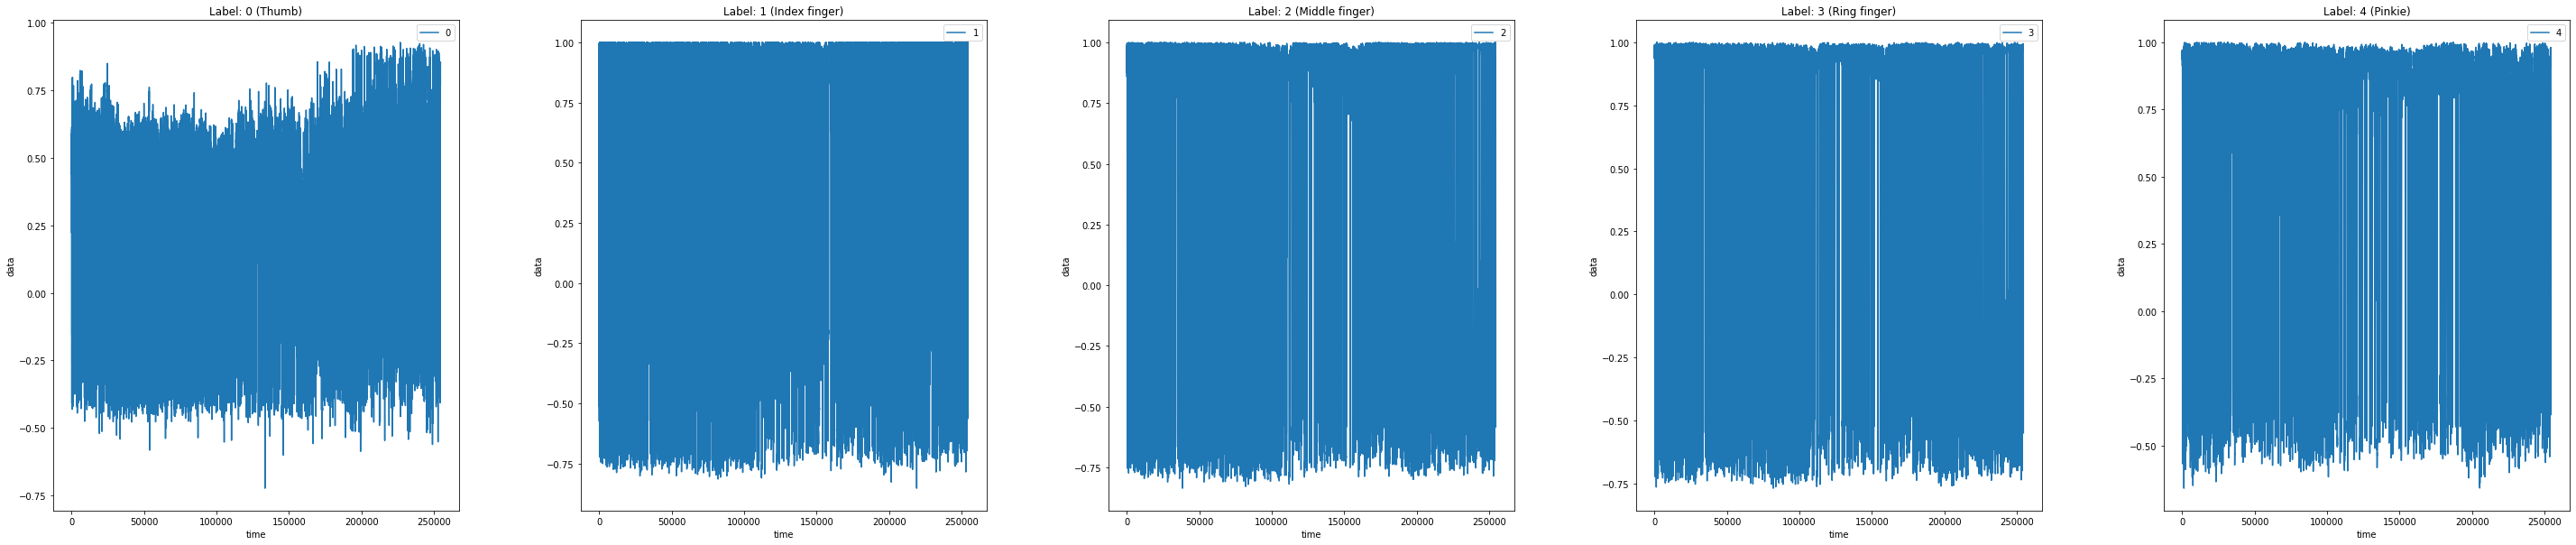

In [23]:
check_y_time_series(y)

The X time series values (features) change dramatically over time while the y time series values (labels) do not change. Due to the changes in the X data, we tried a MinMaxScaler determined on, say, the first 70% (taken to be the training data) to the remaining 30% (taken to be the validation and test data; this is a typical split) since obviously the mean and standard deviation do change significantly. However, this led to problems in the NN fits. Thus, we shifted back to the StandardScaler. Now the mean and std do still change but not as dramatically as with the MinMaxScaler. (Recall that applying some scaling to the features is useful when using an NN model. This helps the values of the weights to stay at reasonable, small values and not fluctuate excessively during fitting.)

**Initial modeling using a smaller data set (initial 10% of all data)**

*Loss function.* This is a multi-output regression problem since we need to predict a real-valued vector, with 5 components. Thus the appropriate loss or error function is the mean_squared_error.

In [26]:
from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [26]:
# train/valid_test split = 70%/30%, valid/test split = 50%/50%
# Therefore, train/valid/test split = 70%/15%/15%

###
# use only 10%, i.e, first 25000 values
X_small = X[:25000,:]
y_small = y[:25000,:]
###

# perhaps should not use this for such time series data, but the splitting code below leads to problems in the NN fits 
X_train, X_valid_test, y_train, y_valid_test = train_test_split(X_small, y_small, test_size=0.30, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid_test, y_valid_test, test_size=0.50, random_state=42)

###
# The splitting code below leads to problems in the NN fits so dont use it (maybe only with RNNs)
# Be careful in splitting time series data: using train_test_split will randomly reorder the data
# The simple code here does the same split without reordering any data
# train / validate / test split = first 70% / next 15% / last 15%
# X_train = X_small[:int(X_small.shape[0]*0.70)]
# X_valid_test = X_small[int(X_small.shape[0]*0.70):]
# y_train = y_small[:int(X_small.shape[0]*0.70)]
# y_valid_test = y_small[int(X_small.shape[0]*0.70):]

# X_valid = X_valid_test[:int(X_valid_test.shape[0]*0.50)]
# X_test = X_valid_test[int(X_valid_test.shape[0]*0.50):]
# y_valid = y_valid_test[:int(X_valid_test.shape[0]*0.50)]
# y_test = y_valid_test[int(X_valid_test.shape[0]*0.50):]

# or can use this:
# X_train, X_valid_test, y_train, y_valid_test = train_test_split(X_small, y_small, test_size=0.30, shuffle=False)
# X_valid, X_test, y_valid, y_test = train_test_split(X_valid_test, y_valid_test, test_size=0.50, shuffle=False)
###

print(X.shape, y.shape)
print(X_small.shape, y_small.shape)
print(X_train.shape, y_train.shape, X_valid_test.shape, y_valid_test.shape)
print(X_valid.shape, y_valid.shape, X_test.shape, y_test.shape)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

### from sklearn.preprocessing import MinMaxScaler
### scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_valid_test = scaler.transform(X_valid_test)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

(254649, 30) (254649, 5)
(25000, 30) (25000, 5)
(17500, 30) (17500, 5) (7500, 30) (7500, 5)
(3750, 30) (3750, 5) (3750, 30) (3750, 5)


In [27]:
# After applying StandardScaler, re-examine each of the features in X_train
print("Feature  min     max      mean     std")
for j in range(X.shape[1]):
    print("%4d %8.2f %8.2f %8.2f %8.2f" % (j, np.min(X_train[:, j]), np.max(X_train[:, j]), np.mean(X_train[:, j]), np.std(X_train[:, j])))

Feature  min     max      mean     std
   0    -2.35     3.17    -0.00     1.00
   1    -1.59     2.85    -0.00     1.00
   2    -1.21     3.08     0.00     1.00
   3    -1.26     3.31     0.00     1.00
   4    -1.48     3.42    -0.00     1.00
   5    -1.82     3.00    -0.00     1.00
   6    -2.04     3.75    -0.00     1.00
   7    -1.98     4.30    -0.00     1.00
   8    -2.27     4.03    -0.00     1.00
   9    -2.97     4.61    -0.00     1.00
  10    -2.04     2.89     0.00     1.00
  11    -1.70     2.65     0.00     1.00
  12    -1.29     2.90     0.00     1.00
  13    -1.08     3.28     0.00     1.00
  14    -1.22     3.32     0.00     1.00
  15    -1.75     2.94     0.00     1.00
  16    -2.19     3.77    -0.00     1.00
  17    -2.07     3.88    -0.00     1.00
  18    -2.39     3.67    -0.00     1.00
  19    -2.16     3.82    -0.00     1.00
  20    -1.56     2.79     0.00     1.00
  21    -1.35     2.65    -0.00     1.00
  22    -1.06     2.95    -0.00     1.00
  23    -1.04     

In [28]:
# After applying StandardScaler, re-examine each of the features in X_valid
print("Feature  min     max      mean     std")
for j in range(X.shape[1]):
    print("%4d %8.2f %8.2f %8.2f %8.2f" % (j, np.min(X_valid[:, j]), np.max(X_valid[:, j]), np.mean(X_valid[:, j]), np.std(X_valid[:, j])))

Feature  min     max      mean     std
   0    -2.15     3.17     0.01     1.02
   1    -1.59     2.85     0.00     1.01
   2    -1.21     3.08    -0.00     1.01
   3    -1.26     3.31    -0.00     1.00
   4    -1.39     3.42    -0.00     1.00
   5    -1.71     3.00     0.01     1.00
   6    -1.88     3.75     0.02     1.01
   7    -1.98     4.16     0.02     1.03
   8    -2.27     3.90     0.02     1.03
   9    -2.97     4.61     0.03     1.03
  10    -2.04     2.77     0.00     1.01
  11    -1.66     2.65    -0.00     1.01
  12    -1.29     2.90    -0.00     1.00
  13    -1.08     3.28    -0.00     1.00
  14    -1.22     3.26    -0.00     1.00
  15    -1.75     2.94     0.00     1.00
  16    -2.11     3.77     0.02     1.01
  17    -2.07     3.75     0.02     1.02
  18    -2.39     3.67     0.02     1.02
  19    -2.16     3.82     0.02     1.03
  20    -1.56     2.79     0.00     1.01
  21    -1.35     2.65     0.00     1.00
  22    -1.06     2.95    -0.00     1.00
  23    -0.96     

In [29]:
# After applying StandardScaler, re-examine each of the features in X_test
print("Feature  min     max      mean     std")
for j in range(X.shape[1]):
    print("%4d %8.2f %8.2f %8.2f %8.2f" % (j, np.min(X_test[:, j]), np.max(X_test[:, j]), np.mean(X_test[:, j]), np.std(X_test[:, j])))

Feature  min     max      mean     std
   0    -1.95     3.17     0.01     1.00
   1    -1.51     2.85     0.01     1.00
   2    -1.21     3.08     0.01     1.00
   3    -1.26     3.31     0.00     1.00
   4    -1.48     3.33     0.00     1.00
   5    -1.82     3.00     0.01     1.00
   6    -1.88     3.43     0.02     1.01
   7    -1.98     4.30     0.02     1.02
   8    -2.14     4.03     0.02     1.02
   9    -2.97     4.61     0.01     1.01
  10    -1.92     2.77     0.01     0.99
  11    -1.70     2.65     0.01     0.99
  12    -1.29     2.86     0.00     0.99
  13    -1.08     3.24     0.00     1.00
  14    -1.22     3.21     0.00     0.99
  15    -1.66     2.94     0.01     1.00
  16    -2.11     3.38     0.01     1.00
  17    -2.07     3.88     0.01     1.01
  18    -2.27     3.67     0.02     1.01
  19    -2.16     3.82     0.01     1.01
  20    -1.56     2.79     0.00     1.00
  21    -1.28     2.65     0.00     0.99
  22    -1.06     2.95     0.00     0.99
  23    -1.04     

**Model: SVR fit0a (multi-output SVM regressor) on the small data set**

In [30]:
# Create the SVR regressor
svr = SVR(epsilon=0.2)

# Create the Multioutput Regressor
msvr = MultiOutputRegressor(svr)

# Train the regressor
msvr = msvr.fit(X_train, y_train)

# Generate predictions for testing data
y_train_pred = msvr.predict(X_train)

# Generate predictions for valid_test data
y_valid_test_pred = msvr.predict(X_valid_test)

# Generate predictions for valid data
y_valid_pred = msvr.predict(X_valid)

# Generate predictions for test data
y_test_pred = msvr.predict(X_test)

In [31]:
print("training: calculate the regressor for each of the label dimensions")
print("feature  mse  rmse  mae")
mse_tot = 0.0
mae_tot = 0.0
for j in range(y.shape[1]):
    mse = mean_squared_error(y_train[:,j], y_train_pred[:,j])
    mse_tot = mse_tot + mse
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_train[:,j], y_train_pred[:,j])
    mae_tot = mae_tot + mse
    print("%4d %8.2f %8.2f %8.2f" % (j, mse, rmse, mae))
mse_tot = mse_tot / y.shape[1]
rmse_tot = rmse = np.sqrt(mse_tot)
mae_tot = mae_tot / y.shape[1]
print("         ----------------------")
print("     %8.2f %8.2f %8.2f" % (mse_tot, rmse_tot, mae_tot))
print()

print("test: calculate the regressor for each of the label dimensions")
print("Feature  mse  rmse  mae")
mse_tot = 0.0
mae_tot = 0.0
for j in range(y.shape[1]):
    mse = mean_squared_error(y_test[:,j], y_test_pred[:,j])
    mse_tot = mse_tot + mse
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test[:,j], y_test_pred[:,j])
    mae_tot = mae_tot + mse
    print("%4d %8.2f %8.2f %8.2f" % (j, mse, rmse, mae))
mse_tot = mse_tot / y.shape[1]
rmse_tot = rmse = np.sqrt(mse_tot)
mae_tot = mae_tot / y.shape[1]
print("         ----------------------")
print("     %8.2f %8.2f %8.2f" % (mse_tot, rmse_tot, mae_tot))
print()

training: calculate the regressor for each of the label dimensions
feature  mse  rmse  mae
   0     0.02     0.13     0.10
   1     0.02     0.14     0.10
   2     0.03     0.17     0.10
   3     0.01     0.12     0.08
   4     0.02     0.13     0.12
         ----------------------
         0.02     0.14     0.02

test: calculate the regressor for each of the label dimensions
Feature  mse  rmse  mae
   0     0.02     0.13     0.10
   1     0.02     0.15     0.11
   2     0.03     0.18     0.10
   3     0.01     0.12     0.09
   4     0.02     0.13     0.12
         ----------------------
         0.02     0.14     0.02



We see that the errors in the 5 dimensions are roughly equal.

In [32]:
def check_fit_quality(y_train=y_train, y_train_pred=y_train_pred, y_valid_test=y_valid_test, y_valid_test_pred=y_valid_test_pred):
    print()
    print('Check fit quality')
    print()
    fig, axs = plt.subplots(1, 5, figsize=(80, 20))
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    #plt.title('Fit quality')
    #axs.set_aspect('equal', adjustable='box')

    line = np.linspace(-1.1,1.1,10)
    titles = ['Label: 0 (Thumb)', 'Label: 1 (Index finger)', 'Label: 2 (Middle finger)', 'Label: 3 (Ring finger)', 'Label: 4 (Pinkie)']
    for j in range(5):
        #axs[0, j].set_xlim([-1.1, 1.1])
        #axs[0, j].set_ylim([-1.1, 1.1])
        axs[j].scatter(     y_train[:,j],      y_train_pred[:,j], c = 'brown', s = 30, label = 'train')
        axs[j].scatter(y_valid_test[:,j], y_valid_test_pred[:,j], c = 'green', s = 30, label = 'valid_test')
        axs[j].plot(line, line)
        axs[j].set_title(titles[j])
        axs[j].legend()
        axs[j].set_xlabel('Actual')
        axs[j].set_ylabel('Predict')

    plt.show()


Check fit quality



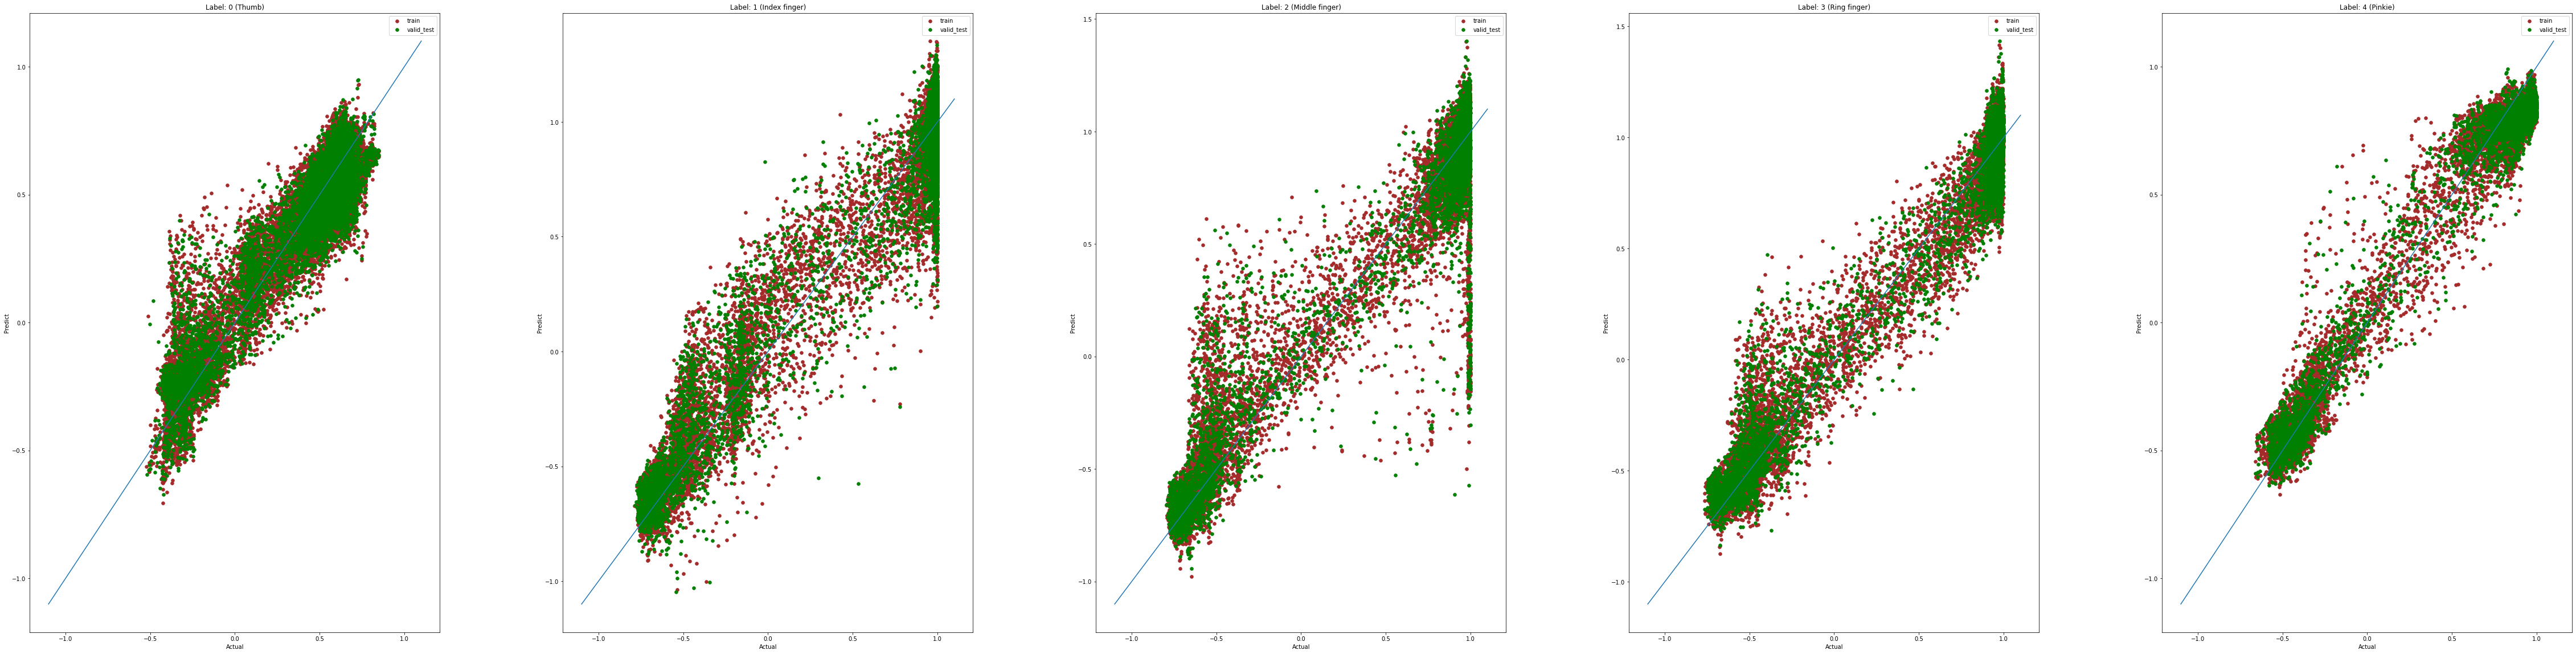

In [33]:
check_fit_quality(y_train=y_train, y_train_pred=y_train_pred, y_valid_test=y_valid_test, y_valid_test_pred=y_valid_test_pred)

The SVM 5-d regression fit (SVR) is working but not very well. Another quite significant issue is that it is very time consuming, even on just 10% of the total data. One reaon for the slowness is that the GPU is not being utilized in the SVR fitting. Thus, we now sshift to NN-based fits.

In [31]:
#  tensorflow 2.0 library provides functions for deep neural networks 
import tensorflow
print(tensorflow.__version__)

from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding

2.4.1


**Model: ANN fit1a (fully connected/dense NN, with two hidden layers with sizes 60 & 40) on the small data set**

In [24]:
def create_ann(input_shape=X_train.shape[1], output_shape=y_train.shape[1]):

    input_layer = Input(shape=input_shape) # 30
    dense_layer_1 = Dense(60, activation='relu')(input_layer) # 60
    dense_layer_2 = Dense(40, activation='relu')(dense_layer_1) # 40    
    output = Dense(output_shape, activation='linear')(dense_layer_2) # 5

    model = Model(inputs=input_layer, outputs=output)
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
    return model

In [25]:
print(X_train.shape[1])
print(y_train.shape[1])
model = create_ann(input_shape=X_train.shape[1], output_shape=y_train.shape[1])
model.summary()

30
5
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 30)]              0         
_________________________________________________________________
dense (Dense)                (None, 60)                1860      
_________________________________________________________________
dense_1 (Dense)              (None, 40)                2440      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 205       
Total params: 4,505
Trainable params: 4,505
Non-trainable params: 0
_________________________________________________________________


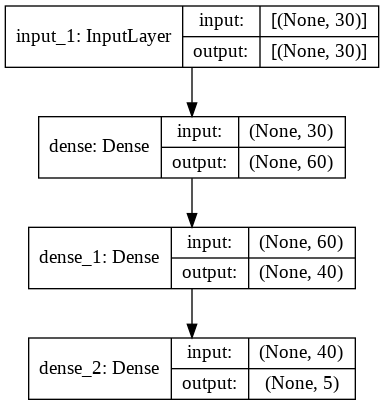

In [26]:
# plot the graph  of the model and save to file
plot_model(model, to_file='model_1a.png', show_shapes=True, show_layer_names=True)

In [27]:
def plot_history(history):
    
    #-----------------------------------------------------------
    # Retrieve results on training and validation data sets
    # for each training epoch
    #-----------------------------------------------------------
    
    mse      = history.history['mean_squared_error']
    val_mse  = history.history['val_mean_squared_error']
    loss     = history.history['loss']
    val_loss = history.history['val_loss']
    epochs   = range(1,len(mse)+1) 
    
    plt.rcParams['font.size'] = 16
    plt.rcParams['axes.spines.right'] = False
    plt.rcParams['axes.spines.top'] = False

    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
    
    #------------------------------------------------
    # Plot training and validation mse per epoch
    #------------------------------------------------
    ax1.plot(epochs, mse,  label='Training mse')
    ax1.plot(epochs, val_mse,  label='Validation mse')
    ax1.set_title('Loss = MSE')
    ax1.set_xlabel('epoch')
    ax1.set_ylabel('mse')
    #ax1.set_ylim(0.5,1.2)
    ax1.legend()

    #------------------------------------------------
    # Plot training and validation rmse per epoch
    #------------------------------------------------
    ax2.plot(epochs, np.sqrt(mse),  label='Training rmse')
    ax2.plot(epochs, np.sqrt(val_mse),  label='Validation rmse')
    ax2.set_title('RMSE')
    ax2.set_xlabel('epoch')
    ax2.set_ylabel('rmse')
    #ax2.set_ylim(0.5,1.2)
    ax2.legend()

    fig.tight_layout()
    plt.show()

In [39]:
batch_size = 64
epochs = 150

In [40]:
%%time 

history1a = model.fit(X_train, y_train, batch_size=batch_size, 
                                  epochs=epochs,
                                  verbose=1,
                                  validation_data=(X_valid, y_valid))

Epoch 1/150
274/274 [==============================] - 2s 6ms/step - loss: 0.2468 - mean_squared_error: 0.2468 - val_loss: 0.0427 - val_mean_squared_error: 0.0427
Epoch 2/150
274/274 [==============================] - 1s 4ms/step - loss: 0.0370 - mean_squared_error: 0.0370 - val_loss: 0.0278 - val_mean_squared_error: 0.0278
Epoch 3/150
274/274 [==============================] - 1s 3ms/step - loss: 0.0260 - mean_squared_error: 0.0260 - val_loss: 0.0227 - val_mean_squared_error: 0.0227
Epoch 4/150
274/274 [==============================] - 1s 3ms/step - loss: 0.0214 - mean_squared_error: 0.0214 - val_loss: 0.0202 - val_mean_squared_error: 0.0202
Epoch 5/150
274/274 [==============================] - 1s 4ms/step - loss: 0.0195 - mean_squared_error: 0.0195 - val_loss: 0.0189 - val_mean_squared_error: 0.0189
Epoch 6/150
274/274 [==============================] - 1s 4ms/step - loss: 0.0179 - mean_squared_error: 0.0179 - val_loss: 0.0177 - val_mean_squared_error: 0.0177
Epoch 7/150
274/274 [=

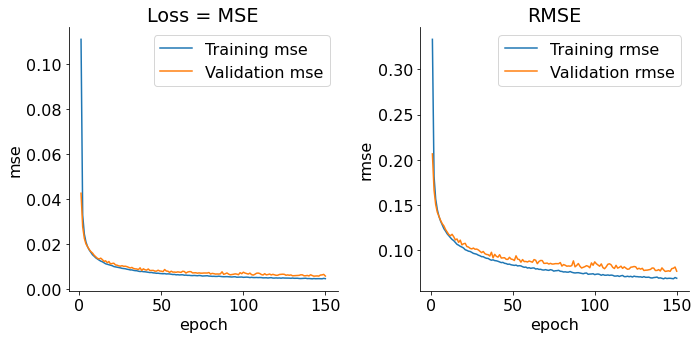

In [41]:
plot_history(history1a)

In [42]:
test_loss, test_mse = model.evaluate(X_test, y_test, batch_size=64, verbose=2)
test_rmse = np.sqrt(test_mse)
y_test_pred = model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_test_pred)
print('test_loss = test_mse, test_rmse, test_mae')
print("          %8.4f  %8.4f  %8.4f" % (test_mse, test_rmse, test_mae))

59/59 - 0s - loss: 0.0062 - mean_squared_error: 0.0062
test_loss = test_mse, test_rmse, test_mae
            0.0062    0.0789    0.0443



Check fit quality



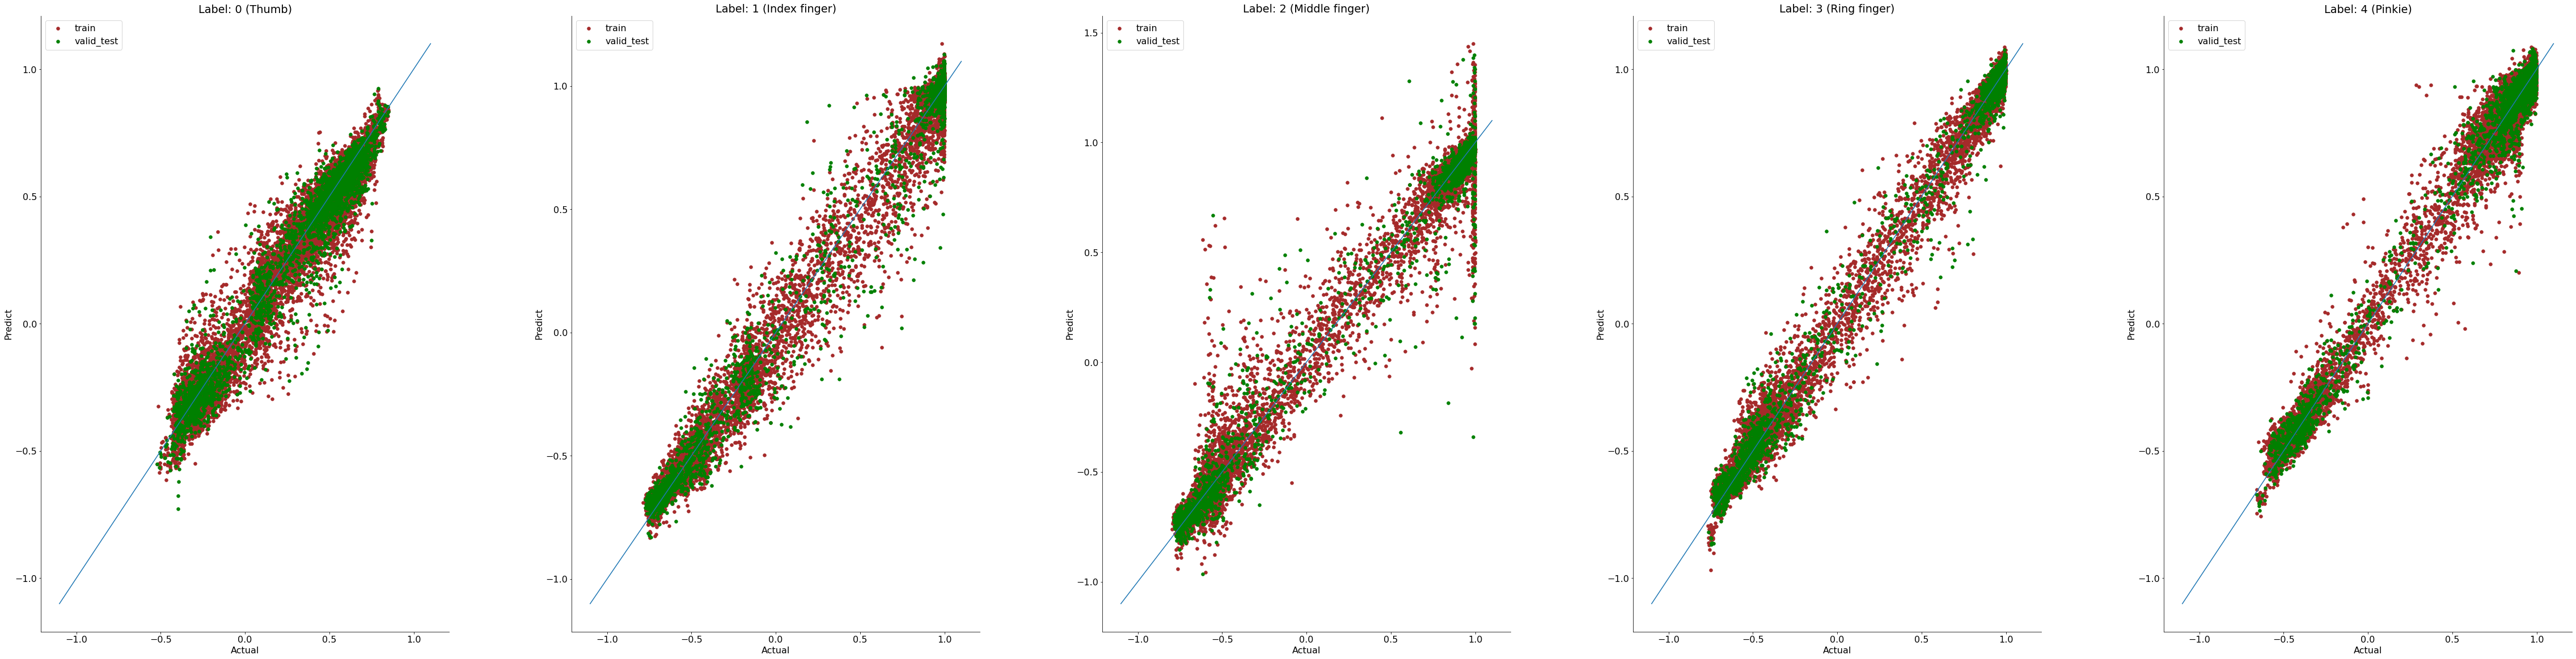

In [43]:
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)
y_test_pred = model.predict(X_test)
                  
check_fit_quality(y_train=y_train, y_train_pred=y_train_pred, y_valid_test=y_valid, y_valid_test_pred=y_valid_pred)

For the small data set, there is an improvement using the ANN fit1 over the SVR fit (rmse: before 0.20, now 0.0820; improved prediction versus ground-truth scatter plots, as seen directly above). Also, importantly, the time for the fit is much reduced, due to the use of the more efficient algorithm (batch fitting, etc.) and GPU. Thus, now try only NN-based fits.

**Model: ANN fit1 (fully connected/dense NN, with two hidden layers with sizes 60 & 40: same as above) on the full data set**

Go back to using the full data set. Hopefully the ANN fitting on google colab with gpu will be run in a reasonable time.

In [28]:
from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

#  tensorflow 2.0 library provides functions for deep neural networks 
import tensorflow
print(tensorflow.__version__)

from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

# same splitting percentages:
# train/valid_test split = 70%/30%, valid/test split = 50%/50%
# Therefore, train/valid/test split = 70%/15%/15%

# perhaps should not use this for such time series data, but the splitting code below leads to problems in the NN fits 
X_train, X_valid_test, y_train, y_valid_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid_test, y_valid_test, test_size=0.50, random_state=42)

###
# The splitting code below leads to problems in the NN fits so dont use it (maybe only with RNNs)
# Be careful in splitting time series data: using train_test_split will randomly reorder the data
# The simple code here does the same split without reordering any data
# train / validate / test split = first 70% / next 15% / last 15%
# X_train = X[:int(X.shape[0]*0.70)]
# X_valid_test = X[int(X.shape[0]*0.70):]
# y_train = y[:int(X.shape[0]*0.70)]
# y_valid_test = y[int(X.shape[0]*0.70):]

# X_valid = X_valid_test[:int(X_valid_test.shape[0]*0.50)]
# X_test = X_valid_test[int(X_valid_test.shape[0]*0.50):]
# y_valid = y_valid_test[:int(X_valid_test.shape[0]*0.50)]
# y_test = y_valid_test[int(X_valid_test.shape[0]*0.50):]

# or can use this:
# X_train, X_valid_test, y_train, y_valid_test = train_test_split(X, y, test_size=0.30, shuffle=False)
# X_valid, X_test, y_valid, y_test = train_test_split(X_valid_test, y_valid_test, test_size=0.50, shuffle=False)
###

print(X.shape, y.shape)
print(X_train.shape, y_train.shape, X_valid_test.shape, y_valid_test.shape)
print(X_valid.shape, y_valid.shape, X_test.shape, y_test.shape)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

### from sklearn.preprocessing import MinMaxScaler
### scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_valid_test = scaler.transform(X_valid_test)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

2.4.1
(254649, 30) (254649, 5)
(178254, 30) (178254, 5) (76395, 30) (76395, 5)
(38197, 30) (38197, 5) (38198, 30) (38198, 5)


In [29]:
batch_size = 64
epochs = 75

In [30]:
%%time 

history1 = model.fit(X_train, y_train, batch_size=batch_size, 
                                  epochs=epochs,
                                  verbose=1,
                                  validation_data=(X_valid, y_valid))

Epoch 1/75
2786/2786 [==============================] - 10s 3ms/step - loss: 0.1259 - mean_squared_error: 0.1259 - val_loss: 0.0536 - val_mean_squared_error: 0.0536
Epoch 2/75
2786/2786 [==============================] - 8s 3ms/step - loss: 0.0483 - mean_squared_error: 0.0483 - val_loss: 0.0417 - val_mean_squared_error: 0.0417
Epoch 3/75
2786/2786 [==============================] - 8s 3ms/step - loss: 0.0405 - mean_squared_error: 0.0405 - val_loss: 0.0368 - val_mean_squared_error: 0.0368
Epoch 4/75
2786/2786 [==============================] - 8s 3ms/step - loss: 0.0368 - mean_squared_error: 0.0368 - val_loss: 0.0346 - val_mean_squared_error: 0.0346
Epoch 5/75
2786/2786 [==============================] - 8s 3ms/step - loss: 0.0346 - mean_squared_error: 0.0346 - val_loss: 0.0329 - val_mean_squared_error: 0.0329
Epoch 6/75
2786/2786 [==============================] - 8s 3ms/step - loss: 0.0329 - mean_squared_error: 0.0329 - val_loss: 0.0329 - val_mean_squared_error: 0.0329
Epoch 7/75
2786

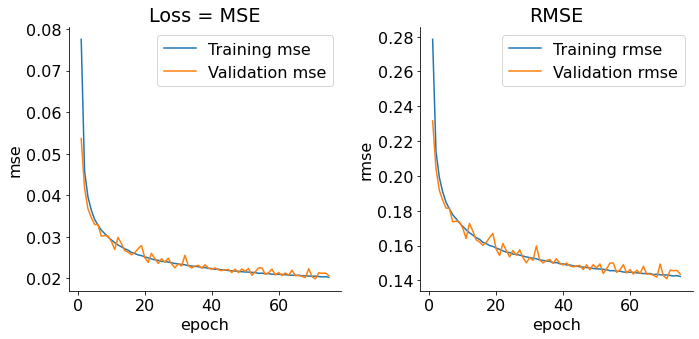

In [31]:
plot_history(history1)

In [32]:
test_loss, test_mse = model.evaluate(X_test, y_test, batch_size=64, verbose=2)
test_rmse = np.sqrt(test_mse)
y_test_pred = model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_test_pred)
print('test_loss = test_mse, test_rmse, test_mae')
print("          %8.4f  %8.4f  %8.4f" % (test_mse, test_rmse, test_mae))

597/597 - 1s - loss: 0.0205 - mean_squared_error: 0.0205
test_loss = test_mse, test_rmse, test_mae
            0.0205    0.1433    0.0891


**Model: ANN fit2 -- a deeper ANN (fully connected/dense NN, with three hidden layers with sizes 100 & 50 & 25) on the full data set**

Try a deeper ANN, with 3 hidden layers instead of just 2 hidden layers.

In [33]:
# same splitting percentages:
# train/valid_test split = 70%/30%, valid/test split = 50%/50%
# Therefore, train/valid/test split = 70%/15%/15%

# perhaps should not use this for such time series data, but the splitting code below leads to problems in the NN fits 
X_train, X_valid_test, y_train, y_valid_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid_test, y_valid_test, test_size=0.50, random_state=42)

###
# The splitting code below leads to problems in the NN fits so dont use it (maybe only with RNNs)
# Be careful in splitting time series data: using train_test_split will randomly reorder the data
# The simple code here does the same split without reordering any data
# train / validate / test split = first 70% / next 15% / last 15%
# X_train = X[:int(X.shape[0]*0.70)]
# X_valid_test = X[int(X.shape[0]*0.70):]
# y_train = y[:int(X.shape[0]*0.70)]
# y_valid_test = y[int(X.shape[0]*0.70):]

# X_valid = X_valid_test[:int(X_valid_test.shape[0]*0.50)]
# X_test = X_valid_test[int(X_valid_test.shape[0]*0.50):]
# y_valid = y_valid_test[:int(X_valid_test.shape[0]*0.50)]
# y_test = y_valid_test[int(X_valid_test.shape[0]*0.50):]

# or can use this:
# X_train, X_valid_test, y_train, y_valid_test = train_test_split(X, y, test_size=0.30, shuffle=False)
# X_valid, X_test, y_valid, y_test = train_test_split(X_valid_test, y_valid_test, test_size=0.50, shuffle=False)
###

print(X.shape, y.shape)
print(X_train.shape, y_train.shape, X_valid_test.shape, y_valid_test.shape)
print(X_valid.shape, y_valid.shape, X_test.shape, y_test.shape)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

### from sklearn.preprocessing import MinMaxScaler
### scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_valid_test = scaler.transform(X_valid_test)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

(254649, 30) (254649, 5)
(178254, 30) (178254, 5) (76395, 30) (76395, 5)
(38197, 30) (38197, 5) (38198, 30) (38198, 5)


In [34]:
def create_ann_deeper(input_shape=X_train.shape[1], output_shape=y_train.shape[1]):

    input_layer = Input(shape=input_shape) # 30
    dense_layer_1 = Dense(100, activation='relu')(input_layer) # 100
    dense_layer_2 = Dense(50, activation='relu')(dense_layer_1) # 50
    dense_layer_3 = Dense(25, activation='relu')(dense_layer_2) # 25
    output = Dense(output_shape, activation='linear')(dense_layer_3) # 5

    model = Model(inputs=input_layer, outputs=output)
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
    return model

In [35]:
print(X_train.shape[1])
print(y_train.shape[1])
model = create_ann_deeper(input_shape=X_train.shape[1], output_shape=y_train.shape[1])
model.summary()

30
5
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 30)]              0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               3100      
_________________________________________________________________
dense_4 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_5 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 130       
Total params: 9,555
Trainable params: 9,555
Non-trainable params: 0
_________________________________________________________________


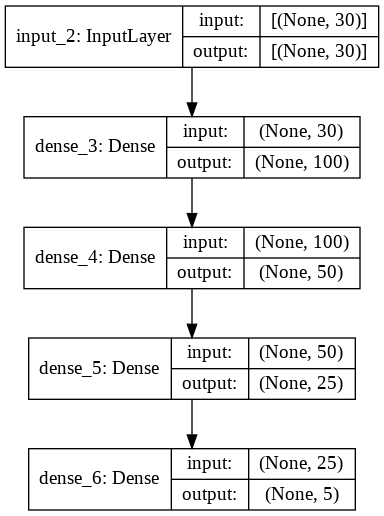

In [36]:
# plot the graph  of the model and save to file
plot_model(model, to_file='model_2_deeper.png', show_shapes=True, show_layer_names=True)

In [37]:
batch_size = 64
epochs = 75

In [38]:
%%time 

history2_deeper = model.fit(X_train, y_train, batch_size=batch_size, 
                                  epochs=epochs,
                                  verbose=1,
                                  validation_data=(X_valid, y_valid))

Epoch 1/75
2786/2786 [==============================] - 10s 3ms/step - loss: 0.1066 - mean_squared_error: 0.1066 - val_loss: 0.0388 - val_mean_squared_error: 0.0388
Epoch 2/75
2786/2786 [==============================] - 9s 3ms/step - loss: 0.0371 - mean_squared_error: 0.0371 - val_loss: 0.0318 - val_mean_squared_error: 0.0318
Epoch 3/75
2786/2786 [==============================] - 9s 3ms/step - loss: 0.0314 - mean_squared_error: 0.0314 - val_loss: 0.0274 - val_mean_squared_error: 0.0274
Epoch 4/75
2786/2786 [==============================] - 9s 3ms/step - loss: 0.0281 - mean_squared_error: 0.0281 - val_loss: 0.0279 - val_mean_squared_error: 0.0279
Epoch 5/75
2786/2786 [==============================] - 9s 3ms/step - loss: 0.0258 - mean_squared_error: 0.0258 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 6/75
2786/2786 [==============================] - 10s 4ms/step - loss: 0.0246 - mean_squared_error: 0.0246 - val_loss: 0.0226 - val_mean_squared_error: 0.0226
Epoch 7/75
278

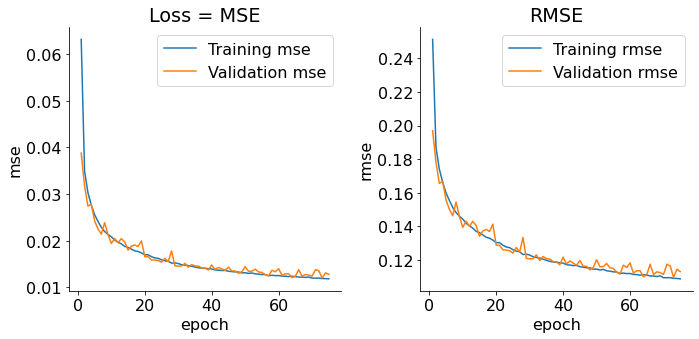

In [39]:
plot_history(history2_deeper)

In [40]:
test_loss, test_mse = model.evaluate(X_test, y_test, batch_size=64, verbose=2)
test_rmse = np.sqrt(test_mse)
y_test_pred = model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_test_pred)
print('test_loss = test_mse, test_rmse, test_mae')
print("          %8.4f  %8.4f  %8.4f" % (test_mse, test_rmse, test_mae))

597/597 - 1s - loss: 0.0128 - mean_squared_error: 0.0128
test_loss = test_mse, test_rmse, test_mae
            0.0128    0.1133    0.0618


**Model: ANN fit3 -- a broader ANN (fully connected/dense NN, with two hidden layers with sizes 300 & 30) on the full data set**

Try a broader ANN.

In [41]:
def create_ann_broader(input_shape=X_train.shape[1], output_shape=y_train.shape[1]):

    input_layer = Input(shape=input_shape) # 30
    dense_layer_1 = Dense(300, activation='relu')(input_layer) # 100
    dense_layer_2 = Dense(30, activation='relu')(dense_layer_1) # 100
    output = Dense(output_shape, activation='linear')(dense_layer_2) # 5

    model = Model(inputs=input_layer, outputs=output)
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
    return model

In [42]:
print(X_train.shape[1])
print(y_train.shape[1])
model = create_ann_broader(input_shape=X_train.shape[1], output_shape=y_train.shape[1])
model.summary()

30
5
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 30)]              0         
_________________________________________________________________
dense_7 (Dense)              (None, 300)               9300      
_________________________________________________________________
dense_8 (Dense)              (None, 30)                9030      
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 155       
Total params: 18,485
Trainable params: 18,485
Non-trainable params: 0
_________________________________________________________________


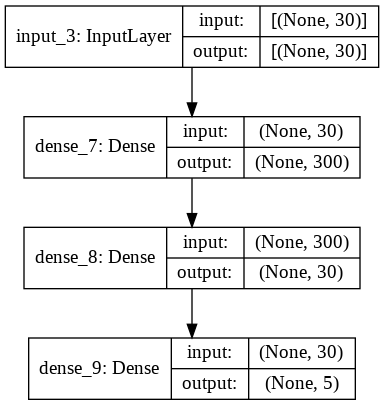

In [43]:
# plot the graph  of the model and save to file
plot_model(model, to_file='model3_broader.png', show_shapes=True, show_layer_names=True)

In [44]:
batch_size = 64
epochs = 75

In [45]:
%%time 

history3_broader = model.fit(X_train, y_train, batch_size=batch_size, 
                                  epochs=epochs,
                                  verbose=1,
                                  validation_data=(X_valid, y_valid))

Epoch 1/75
2786/2786 [==============================] - 9s 3ms/step - loss: 0.0916 - mean_squared_error: 0.0916 - val_loss: 0.0466 - val_mean_squared_error: 0.0466
Epoch 2/75
2786/2786 [==============================] - 8s 3ms/step - loss: 0.0391 - mean_squared_error: 0.0391 - val_loss: 0.0344 - val_mean_squared_error: 0.0344
Epoch 3/75
2786/2786 [==============================] - 8s 3ms/step - loss: 0.0334 - mean_squared_error: 0.0334 - val_loss: 0.0364 - val_mean_squared_error: 0.0364
Epoch 4/75
2786/2786 [==============================] - 9s 3ms/step - loss: 0.0305 - mean_squared_error: 0.0305 - val_loss: 0.0308 - val_mean_squared_error: 0.0308
Epoch 5/75
2786/2786 [==============================] - 8s 3ms/step - loss: 0.0283 - mean_squared_error: 0.0283 - val_loss: 0.0267 - val_mean_squared_error: 0.0267
Epoch 6/75
2786/2786 [==============================] - 9s 3ms/step - loss: 0.0267 - mean_squared_error: 0.0267 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 7/75
2786/

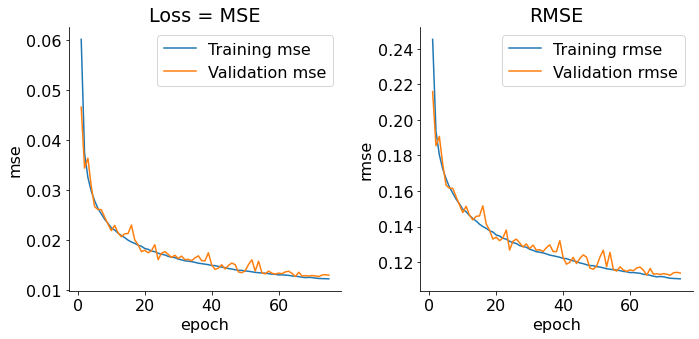

In [46]:
plot_history(history3_broader)

In [47]:
test_loss, test_mse = model.evaluate(X_test, y_test, batch_size=64, verbose=2)
test_rmse = np.sqrt(test_mse)
y_test_pred = model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_test_pred)
print('test_loss = test_mse, test_rmse, test_mae')
print("          %8.4f  %8.4f  %8.4f" % (test_mse, test_rmse, test_mae))

597/597 - 1s - loss: 0.0130 - mean_squared_error: 0.0130
test_loss = test_mse, test_rmse, test_mae
            0.0130    0.1140    0.0678


**Results summary**

In [19]:
from tabulate import tabulate

print(tabulate([
  ["Data size", "Method",             "params", "Fit name", "Lr",  "Decay", "Epoch", "Run time [mm:ss]", "train_rmse", "test_rmse", "test_mae"],
  [ 25000, "SVR",                      "",      "0a",       "",     "",      "",      ">10:00",          "0.3742",     "0.1400",   "0.0200"],
  [ 25000, "ANN (hidden:  60, 40,  -)", 4505,   "1a",       "1e-3", 0.9,      75,     "",                 0.0755,       "",        ""],
  [ 25000, "ANN (hidden:  60, 40,  -)", 4505,   "1a",       "1e-3", 0.9,     150,     "  3:03",          "0.0670",      0.0789,     0.0443],
  [254649, "ANN (hidden:  60, 40,  -)", 4505,   "1 ",       "1e-3", 0.9,      75,     " 13:55",           0.1421,       0.1433,     0.0891],
  [254649, "ANN (hidden: 100, 50, 25)", 9555,   "2 ",       "1e-3", 0.9,      75,     " 14:36",           0.1086,       0.1133,     0.0618],
  [254649, "ANN (hidden: 300, 30,  -)", 18485,  "3 ",       "1e-3", 0.9,      75,     " 14:09",          "0.1100",     "0.1140",    0.0678]],
  headers="firstrow"))

  Data size  Method                     params    Fit name    Lr    Decay    Epoch    Run time [mm:ss]      train_rmse  test_rmse    test_mae
-----------  -------------------------  --------  ----------  ----  -------  -------  ------------------  ------------  -----------  ----------
      25000  SVR                                  0a                                  >10:00                    0.3742  0.1400       0.0200
      25000  ANN (hidden:  60, 40,  -)  4505      1a          1e-3  0.9      75                                 0.0755
      25000  ANN (hidden:  60, 40,  -)  4505      1a          1e-3  0.9      150      3:03                      0.067   0.0789       0.0443
     254649  ANN (hidden:  60, 40,  -)  4505      1           1e-3  0.9      75       13:55                     0.1421  0.1433       0.0891
     254649  ANN (hidden: 100, 50, 25)  9555      2           1e-3  0.9      75       14:36                     0.1086  0.1133       0.0618
     254649  ANN (hidden: 300, 30, 

In [18]:
# import numpy as np
# print(np.sqrt(0.1400), np.sqrt(0.0057), np.sqrt(0.0049), np.sqrt(0.0202), np.sqrt(0.0118), np.sqrt(0.0121))
## 0.3742 0.0755  0.0670  0.1421  0.1086 "0.1100"

**Conclusions**

The SVR is not really useable due to its slowness. The ANN models fitted faster on GPU resources at google colab. Three ANN models with differnt architectures were tried (all were dense / fully-conected ANNs). As seen from the table above, the best performing one was the deeper ANN with three hidden layers (fit 2). Its performance however was just a little better than that of the broad ANN with two hidden layers (fit 2). However, fit 2 is definitely preferred since it contained only about half the parameters compared to fit 3. While the fitting times were about the same, a smaller number of parameters is expected to result in faster extrapolation when using the trained network to make predictions.

**Postscript: A time-series should not have the data scrambled and should ideally be modeled by an RNN**

An starting example is shown below. However, I did not get this to work yet.

In [28]:
# same splitting percentages:
# train/valid_test split = 70%/30%, valid/test split = 50%/50%
# Therefore, train/valid/test split = 70%/15%/15%

# perhaps should not use this for such time series data, but the splitting code below leads to problems in the NN fits 
# X_train, X_valid_test, y_train, y_valid_test = train_test_split(X, y, test_size=0.30, random_state=42)
# X_valid, X_test, y_valid, y_test = train_test_split(X_valid_test, y_valid_test, test_size=0.50, random_state=42)

###

# Preserve the time information!!!

# The splitting code below leads to problems in the NN fits so dont use it (maybe only with RNNs)
# Be careful in splitting time series data: using train_test_split will randomly reorder the data
# The simple code here does the same split without reordering any data
# train / validate / test split = first 70% / next 15% / last 15%
X_train = X[:int(X.shape[0]*0.70)]
X_valid_test = X[int(X.shape[0]*0.70):]
y_train = y[:int(X.shape[0]*0.70)]
y_valid_test = y[int(X.shape[0]*0.70):]

X_valid = X_valid_test[:int(X_valid_test.shape[0]*0.50)]
X_test = X_valid_test[int(X_valid_test.shape[0]*0.50):]
y_valid = y_valid_test[:int(X_valid_test.shape[0]*0.50)]
y_test = y_valid_test[int(X_valid_test.shape[0]*0.50):]

# or can use this:
# Preserve the time information by using shuffle=False
# X_train, X_valid_test, y_train, y_valid_test = train_test_split(X, y, test_size=0.30, shuffle=False)
# X_valid, X_test, y_valid, y_test = train_test_split(X_valid_test, y_valid_test, test_size=0.50, shuffle=False)
###

print(X.shape, y.shape)
print(X_train.shape, y_train.shape, X_valid_test.shape, y_valid_test.shape)
print(X_valid.shape, y_valid.shape, X_test.shape, y_test.shape)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

### from sklearn.preprocessing import MinMaxScaler
### scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_valid_test = scaler.transform(X_valid_test)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

(254649, 30) (254649, 5)
(178254, 30) (178254, 5) (76395, 30) (76395, 5)
(38197, 30) (38197, 5) (38198, 30) (38198, 5)


**Model: LSTM (a default one suggested by keras) fit4 on the full data set**

Try an RNN, the LSTM type.

In [43]:
def create_lstm(input_shape=X_train.shape[1], output_shape=y_train.shape[1]):

    input_layer = Input(shape=input_shape) # 30
    embedding_layer_1 = Embedding(input_dim=input_shape, output_dim=64)(input_layer) # 64
    lstm_layer_2 = LSTM(128)(embedding_layer_1) # 128
    output = Dense(output_shape, activation='linear')(lstm_layer_2) # 5

    model = Model(inputs=input_layer, outputs=output)
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
    return model

In [44]:
print(X_train.shape[1])
print(y_train.shape[1])
model = create_lstm(input_shape=X_train.shape[1], output_shape=y_train.shape[1])
model.summary()

30
5
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 30)]              0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 30, 64)            1920      
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               98816     
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 645       
Total params: 101,381
Trainable params: 101,381
Non-trainable params: 0
_________________________________________________________________


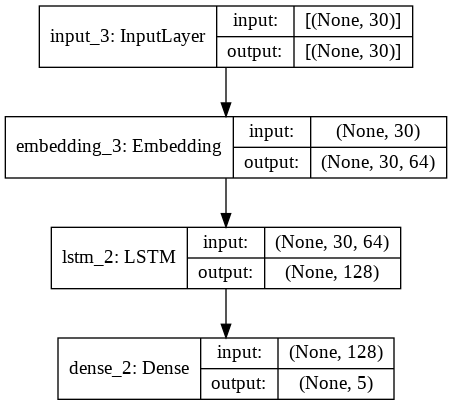

In [45]:
# plot the graph of the model and save to file
plot_model(model, to_file='model4_lstm.png', show_shapes=True, show_layer_names=True)

In [46]:
batch_size = 64
epochs = 75

In [ ]:
plot_history(history4_lstm)

In [ ]:
%%time 

history4_lstm = model.fit(X_train, y_train, batch_size=batch_size, 
                                  epochs=epochs,
                                  verbose=1,
                                  validation_data=(X_valid, y_valid))

In [ ]:
test_loss, test_mse = model.evaluate(X_test, y_test, batch_size=64, verbose=2)
test_rmse = np.sqrt(test_mse)
y_test_pred = model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_test_pred)
print('test_loss = test_mse, test_rmse, test_mae')
print("          %8.4f  %8.4f  %8.4f" % (test_mse, test_rmse, test_mae))